## Projet 1 : Analyse Exploratoire de Données (EDA) des chansonss Spotify les plus écoutés (steams) en 2023

##### © Jessim Ahdjoudj

In [150]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

<b> 1) Exploration préliminaire </b>

In [151]:
data = pd.read_csv('spotify_2023.csv', encoding='ISO-8859-1')
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [153]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [154]:
data.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

<b> 2) Nettoyage et transformation du dataset pour analyse</b>

In [155]:
# Nettoyage valeurs manquantes

missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)

In [156]:
# Correction erreur nom de chansons qui cause problème de DType de la colonne streams

data.loc[data['track_name'] == 'Love Grows (Where My Rosemary Goes)', 'streams'] = 209536449
data['track_name'].loc[data['streams'] == 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']
data['streams'] = data['streams'].astype('int64')

In [157]:
# Correction du Dtype pour les autres colonnes

data['in_deezer_playlists'].replace(',','', regex=True, inplace=True)
data['in_shazam_charts'].replace(',','', regex=True, inplace=True)
data['in_deezer_playlists'] = data['in_deezer_playlists'].astype('int64')
data['in_shazam_charts'] = data['in_deezer_playlists'].astype('int64')

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      953 non-null    int64 
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

<b> 3) Analyse Exploratoire </b>

3.1) Analyse des 5 artistes les plus représentés dans le classement

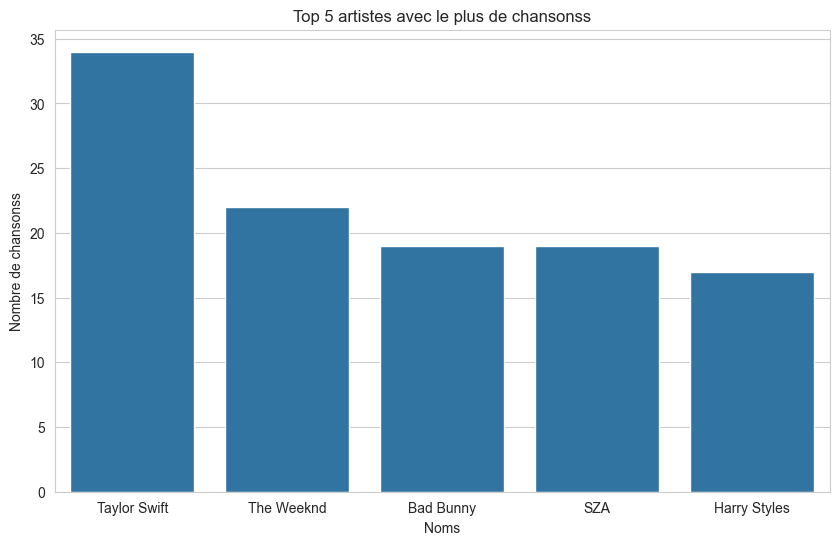

In [159]:
top_artists = data['artist(s)_name'].value_counts().head(5)

plt.figure(figsize = (10, 6))
sns.barplot(x = top_artists.index, y = top_artists)
plt.ylabel('Nombre de chansonss')
plt.xlabel('Noms')
plt.title('Top 5 artistes avec le plus de chansonss')
plt.show()

3.2) Analyse du Top 10

In [160]:
data_10 = data.sort_values(by = 'streams', ascending = False).head(10)
data_10

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,...,104,C#,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,...,170,C#,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,...,125,A#,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,...,95,G#,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,...,186,G,Major,68,49,59,16,0,13,28


Analyses valeurs numériques

In [161]:
data_10_num = data_10.select_dtypes(include = ['float64', 'int64']).copy()
data_10_num.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,1,2019,11,29,43899,69,3703895074,672,199,3421,20,3421,171,50,38,80,0,0,9,7
179,1,2017,1,6,32181,10,3562543890,33,0,6808,7,6808,96,83,93,65,58,0,9,8
86,1,2018,11,8,17836,53,2887241814,440,125,1800,0,1800,110,50,45,41,75,0,11,3
620,1,2019,5,10,24529,0,2864791672,533,167,3595,6,3595,98,82,54,59,69,0,18,10
41,2,2018,10,9,24094,78,2808096550,372,117,843,4,843,90,76,91,50,54,0,7,5


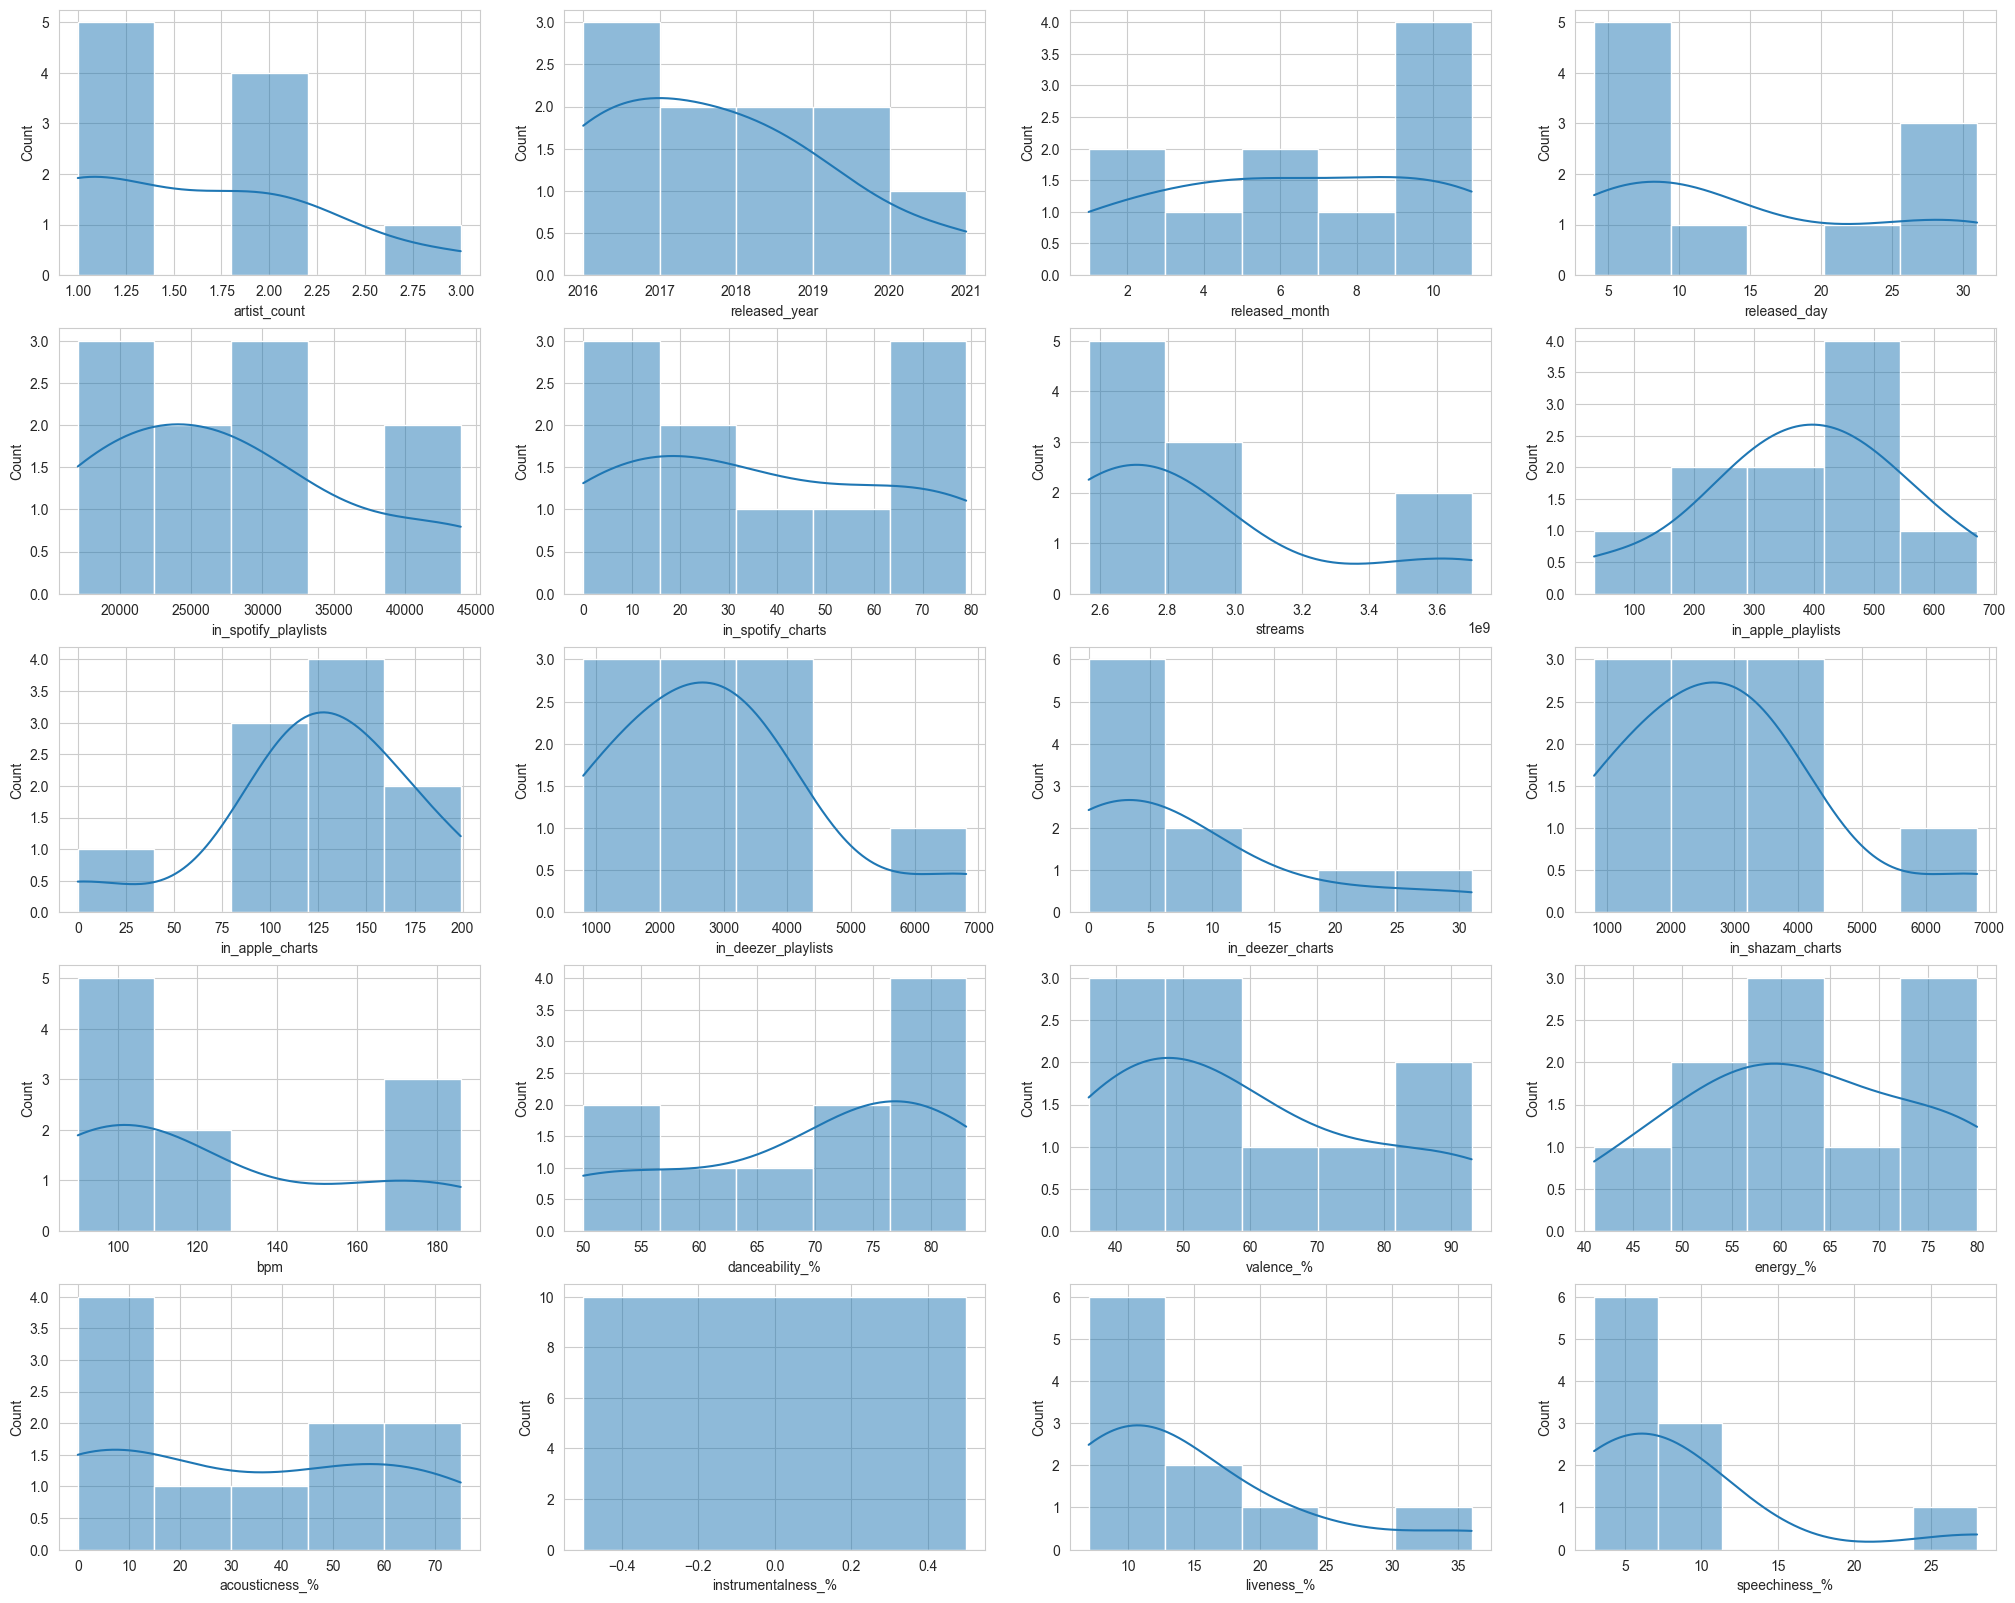

In [162]:
f,ax = plt.subplots(5,4,figsize=(25, 20))

for i, col in enumerate(data_10_num.columns):
        sns.histplot(data=data_10_num, x=col, kde=True, ax=ax[i//4,i%4])

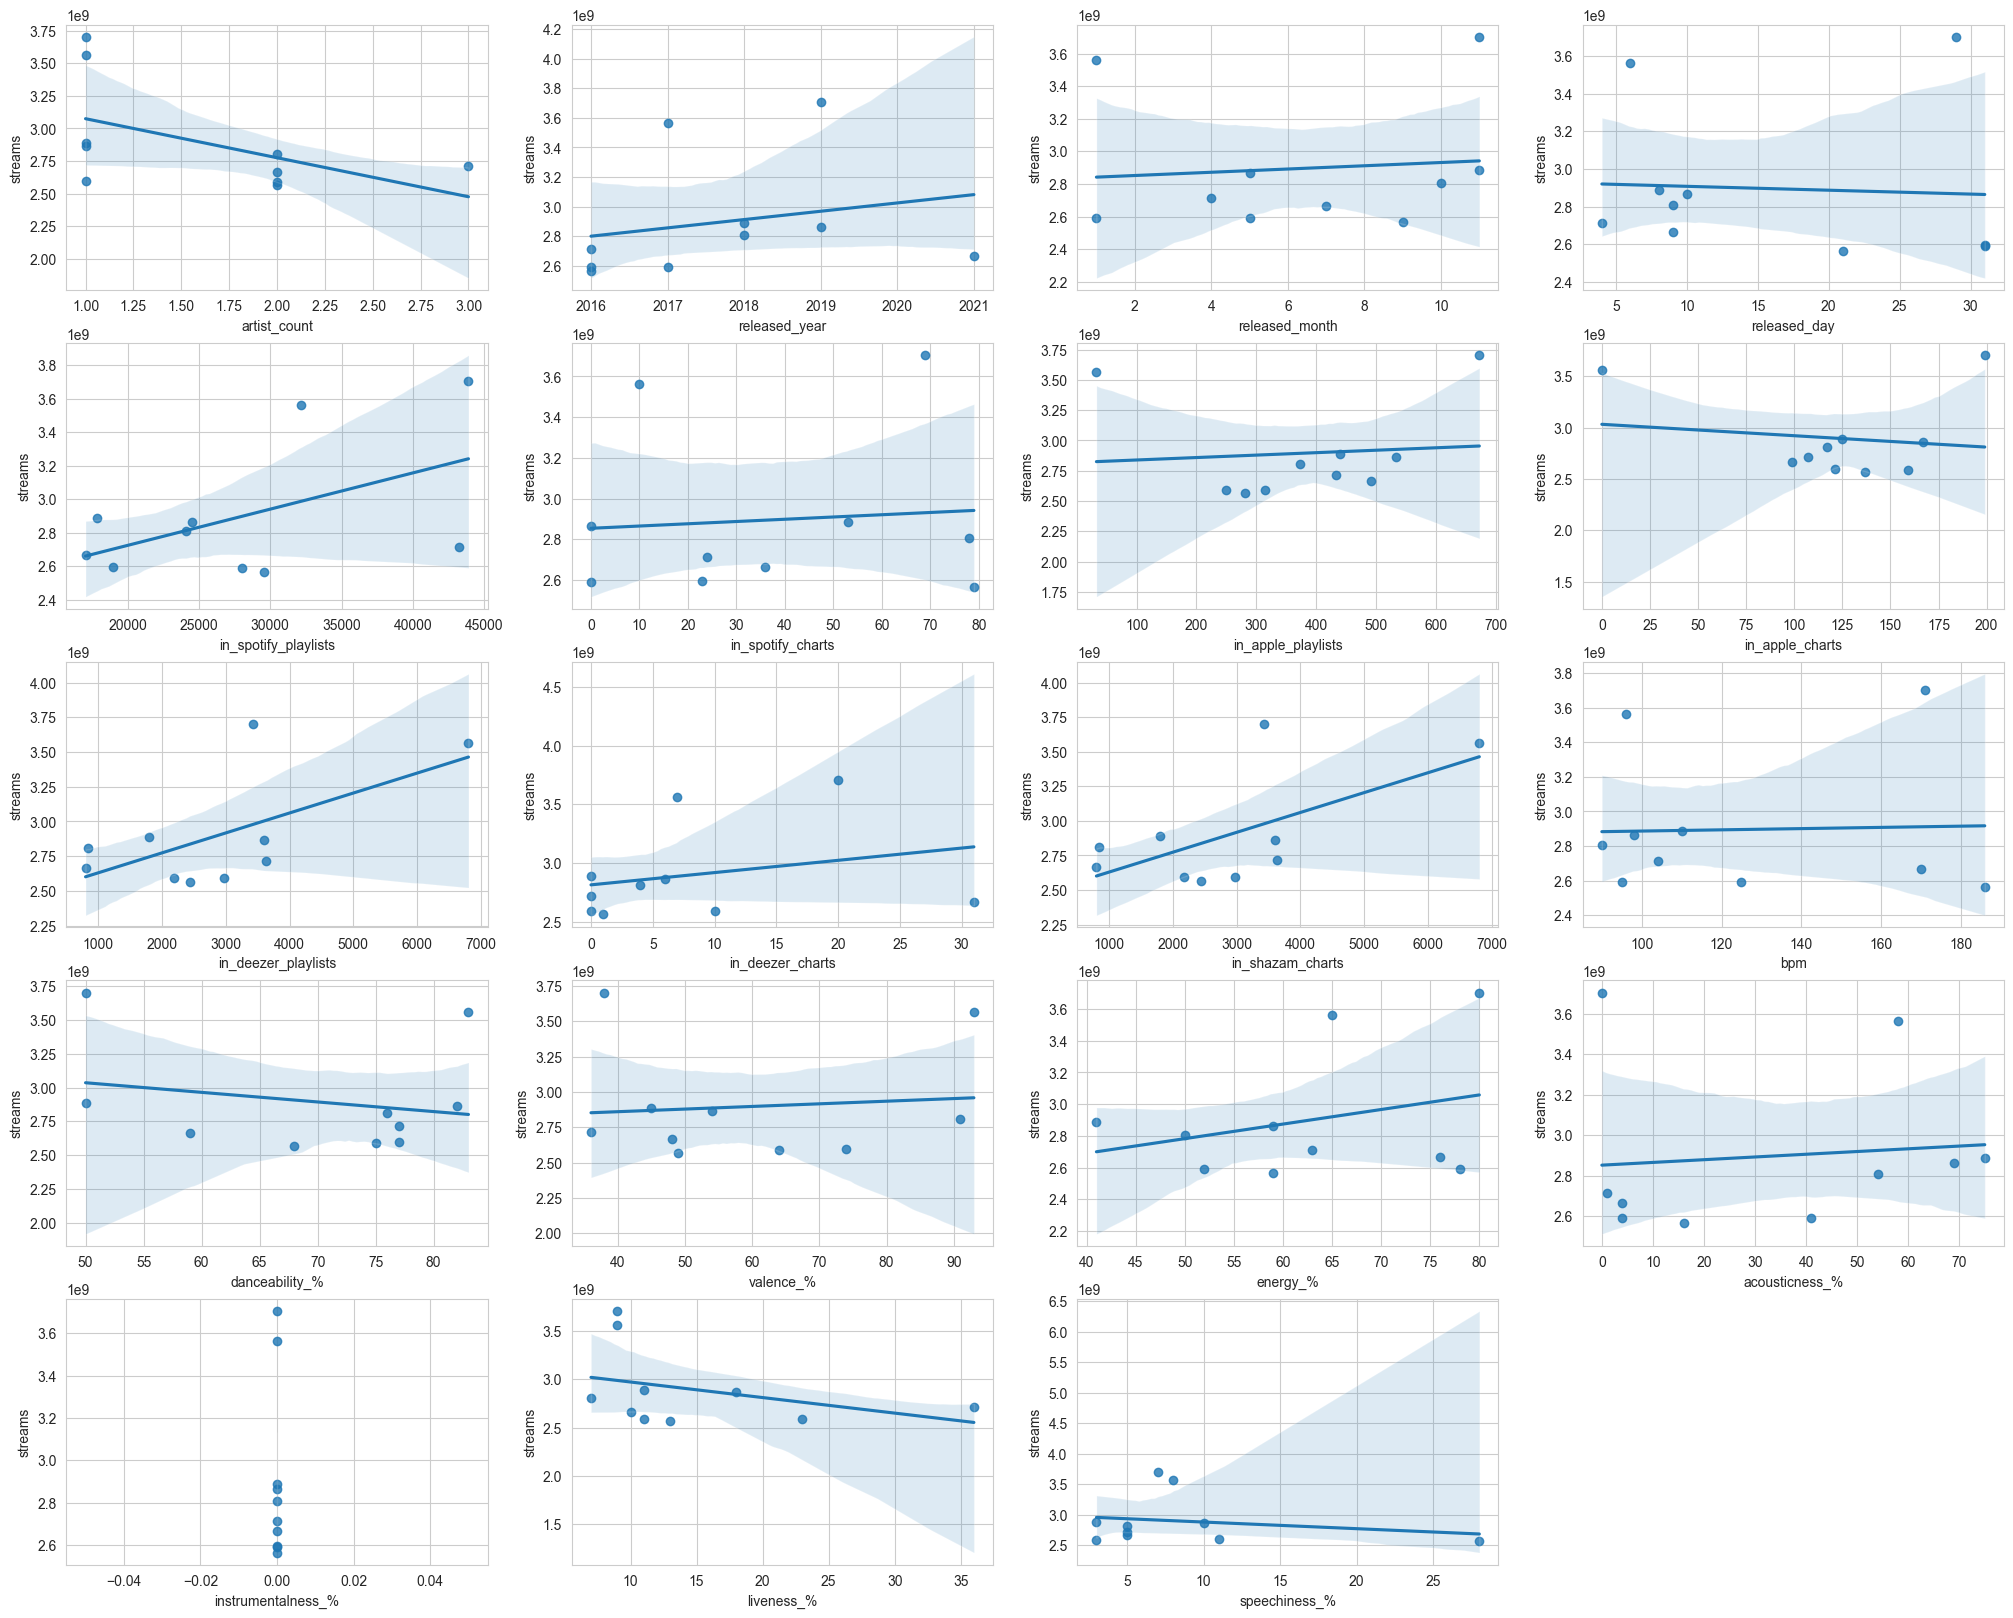

In [163]:
f,ax = plt.subplots(5,4,figsize=(25, 20))

num_cols = data_10_num.loc[:, data_10_num.columns != 'streams'].columns

for i, col in enumerate(num_cols):
        sns.regplot(data=data_10_num, x=col, y='streams', ax=ax[i//4,i%4])

ax[4, 3].set_axis_off()

Analyse valeurs catégoriques

In [164]:
data_10_cat = data_10.select_dtypes(include = ['O']).copy()
data_10_cat

,track_name,artist(s)_name,key,mode
55,Blinding Lights,The Weeknd,C#,Major
179,Shape of You,Ed Sheeran,C#,Minor
86,Someone You Loved,Lewis Capaldi,C#,Major
620,Dance Monkey,Tones and I,F#,Minor
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",D,Major
162,One Dance,"Drake, WizKid, Kyla",C#,Major
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",C#,Major
140,Believer,Imagine Dragons,A#,Minor
725,Closer,"The Chainsmokers, Halsey",G#,Major
48,Starboy,"The Weeknd, Daft Punk",G,Major


C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\1732830384.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\1732830384.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')


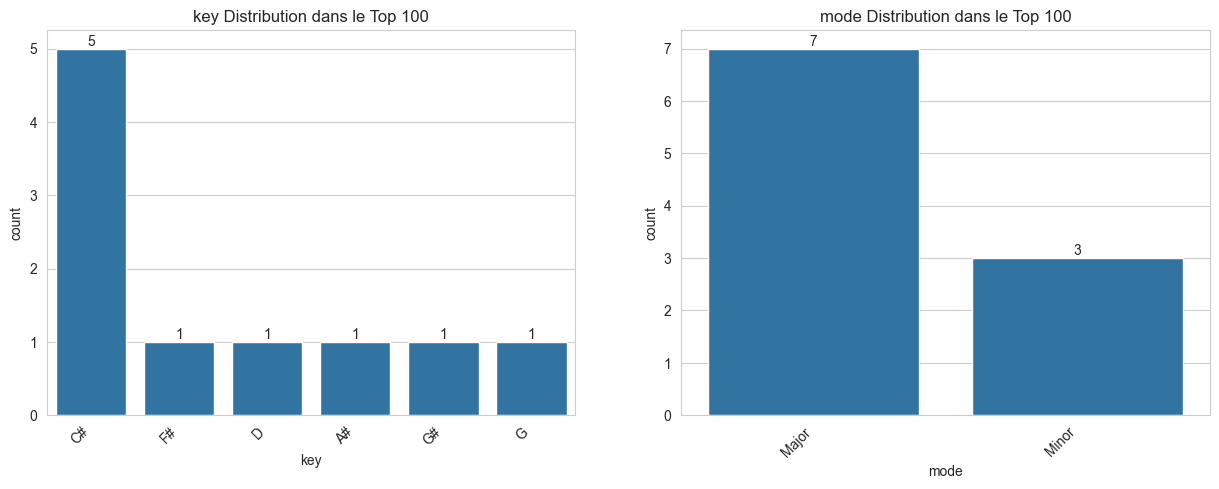

In [165]:
f,ax = plt.subplots(1,2,figsize=(15, 5))

for i, col in enumerate(['key', 'mode']):
    sns.countplot(data=data_10_cat, x=col, ax=ax[i])
    ax[i].set_title(col + ' Distribution dans le Top 100')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    ax[i].bar_label(ax[i].containers[0])

plt.show()

C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\3434545870.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\3434545870.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')


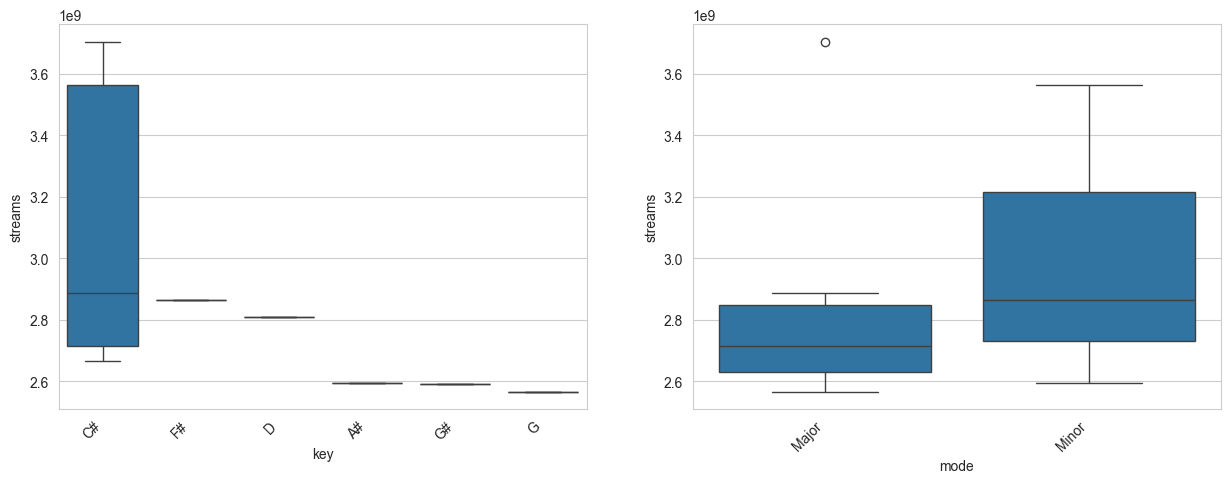

In [166]:
f = pd.melt(data_10, id_vars = ['streams'], value_vars = ['key', 'mode'])

fig, ax = plt.subplots(1, 2, figsize = (15, 5))

for i, col in enumerate(['key', 'mode']):
        sns.boxplot(data = f[f['variable']==col], x = 'value', y = 'streams', ax = ax[i])
        ax[i].set_xlabel(col)
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

3.2) Analysis du Top 100

In [167]:
data_100 = data.sort_values(by = 'streams', ascending = False).head(100)
data_100

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,...,171,C#,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,...,96,C#,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,...,110,C#,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,...,98,F#,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,...,90,D,Major,76,91,50,54,0,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,Shivers,Ed Sheeran,1,2021,9,9,10147,30,1302184087,234,...,141,D,Major,79,82,86,28,0,4,9
401,Heather,Conan Gray,1,2020,3,20,6170,7,1301799902,82,...,92,F,Major,47,25,43,62,0,32,3
22,I Wanna Be Yours,Arctic Monkeys,1,2013,1,1,12859,110,1297026226,24,...,135,NaN,Minor,48,44,42,12,2,11,3
820,Iris,The Goo Goo Dolls,1,1998,3,31,13101,9,1284942608,137,...,156,B,Minor,32,49,72,0,0,9,4


Analyses valeurs numériques

In [168]:
data_100_num = data_100.select_dtypes(include = ['float64', 'int64']).copy()
data_100_num.head()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,1,2019,11,29,43899,69,3703895074,672,199,3421,20,3421,171,50,38,80,0,0,9,7
179,1,2017,1,6,32181,10,3562543890,33,0,6808,7,6808,96,83,93,65,58,0,9,8
86,1,2018,11,8,17836,53,2887241814,440,125,1800,0,1800,110,50,45,41,75,0,11,3
620,1,2019,5,10,24529,0,2864791672,533,167,3595,6,3595,98,82,54,59,69,0,18,10
41,2,2018,10,9,24094,78,2808096550,372,117,843,4,843,90,76,91,50,54,0,7,5


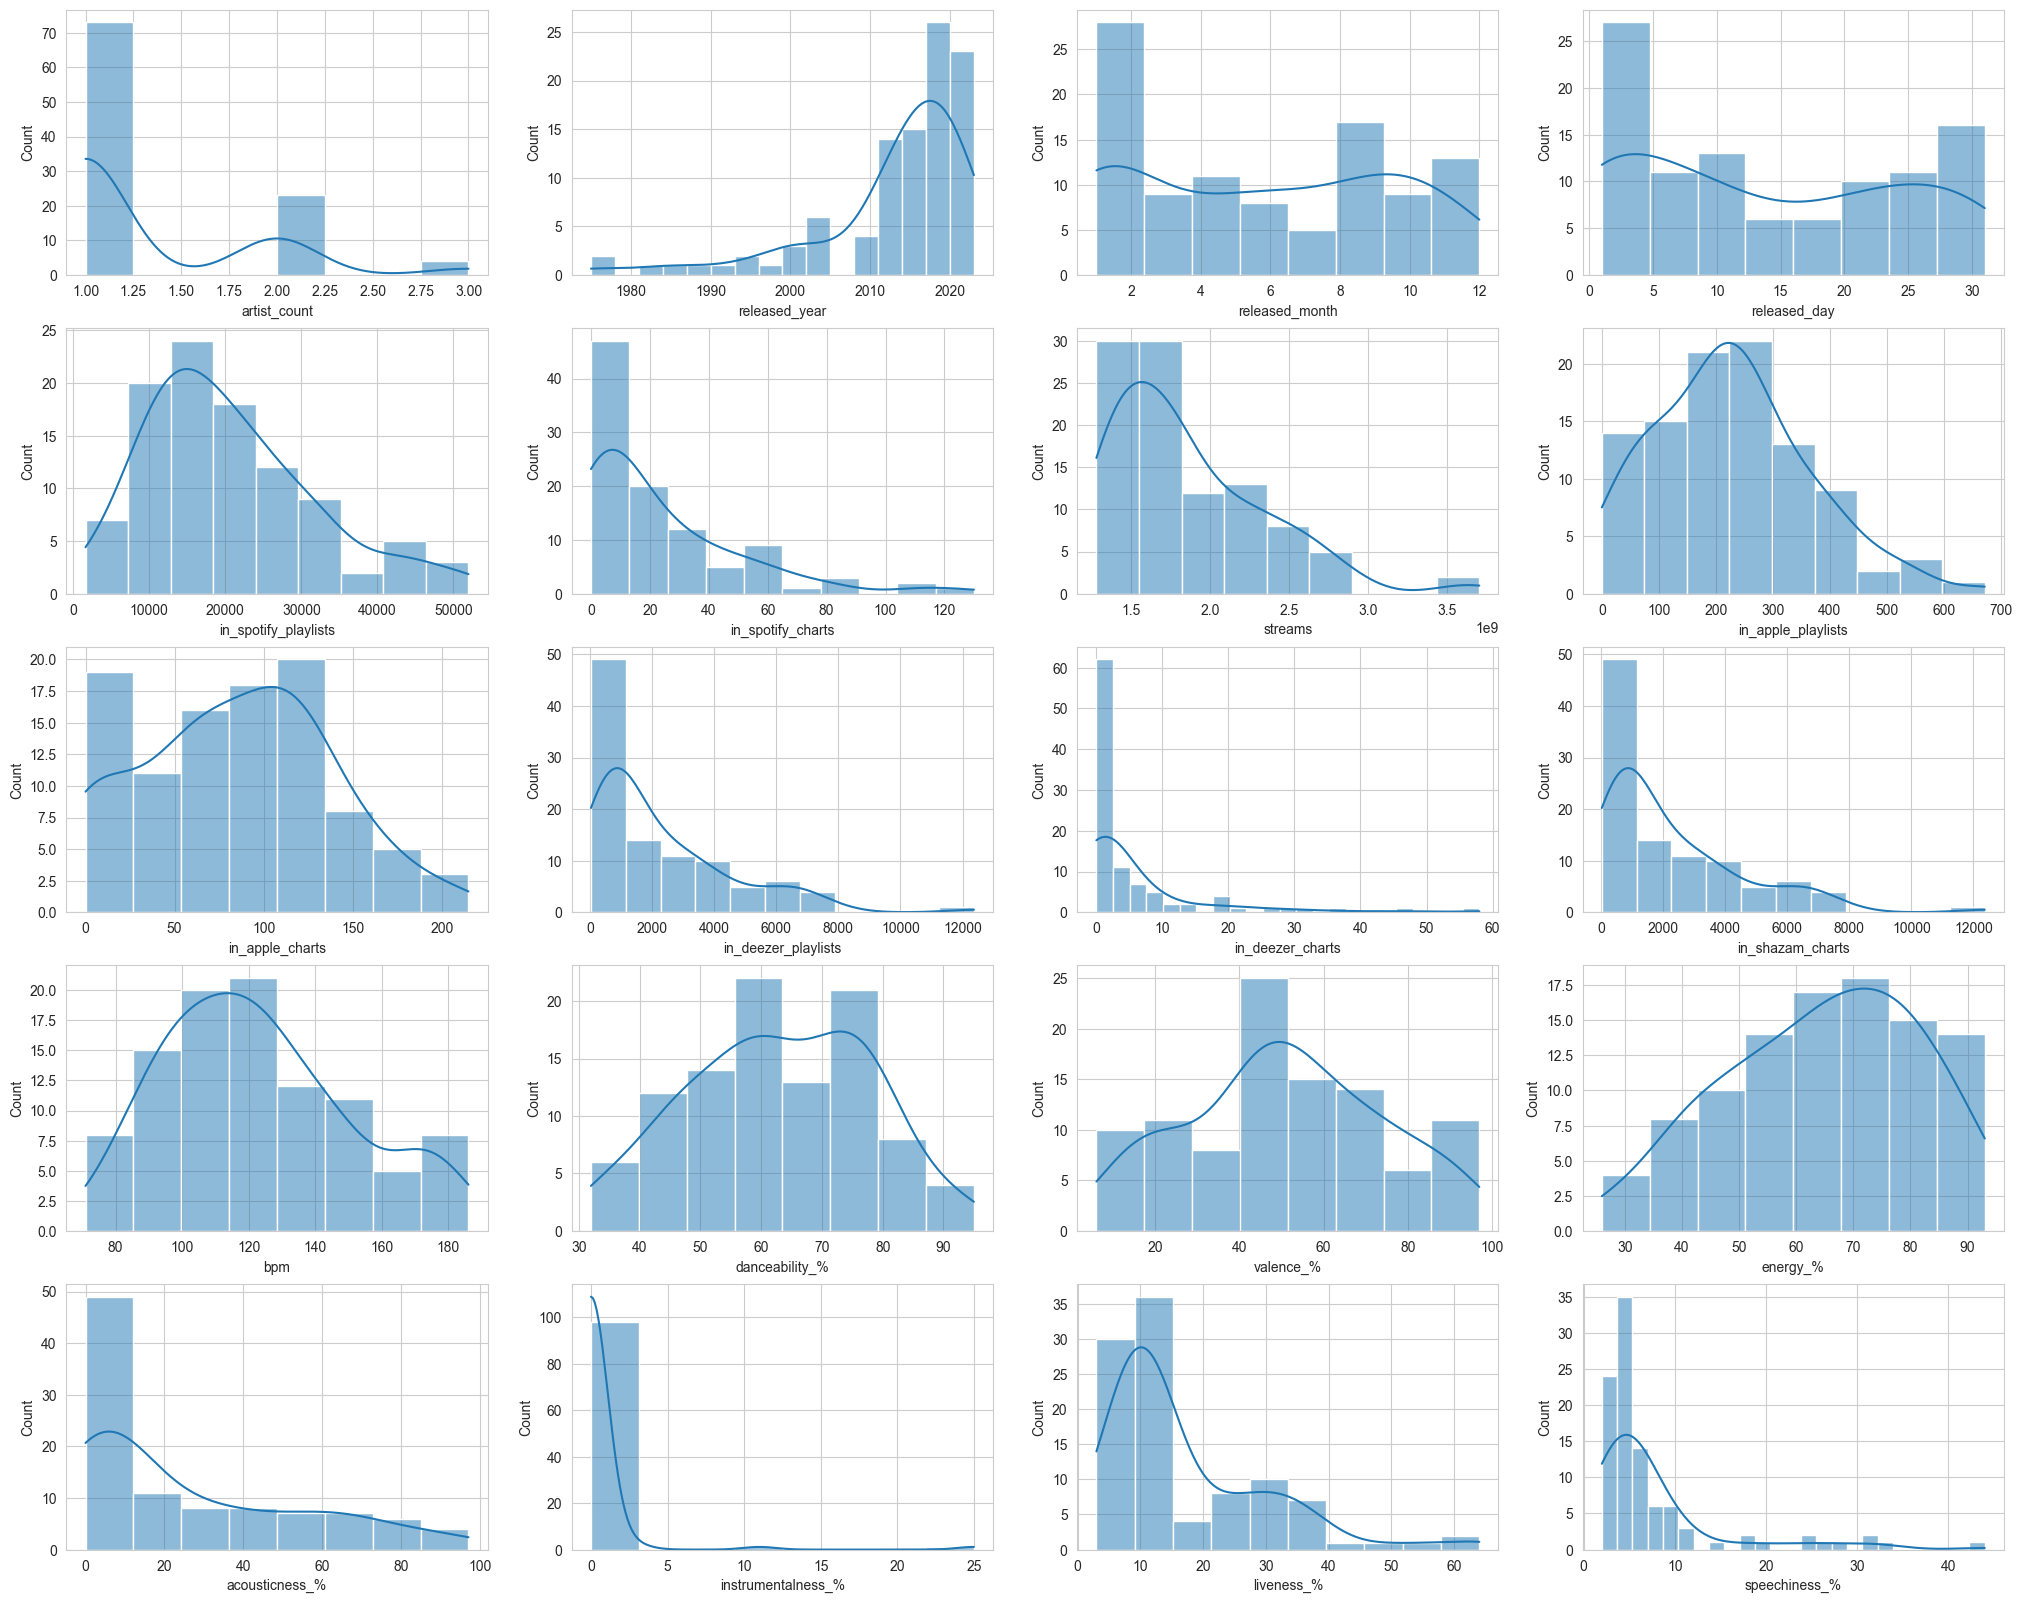

In [169]:
f,ax = plt.subplots(5,4,figsize = (25, 20))

for i, col in enumerate(data_100_num.columns):
        sns.histplot(data = data_100_num, x = col, kde = True, ax = ax[i//4,i%4])

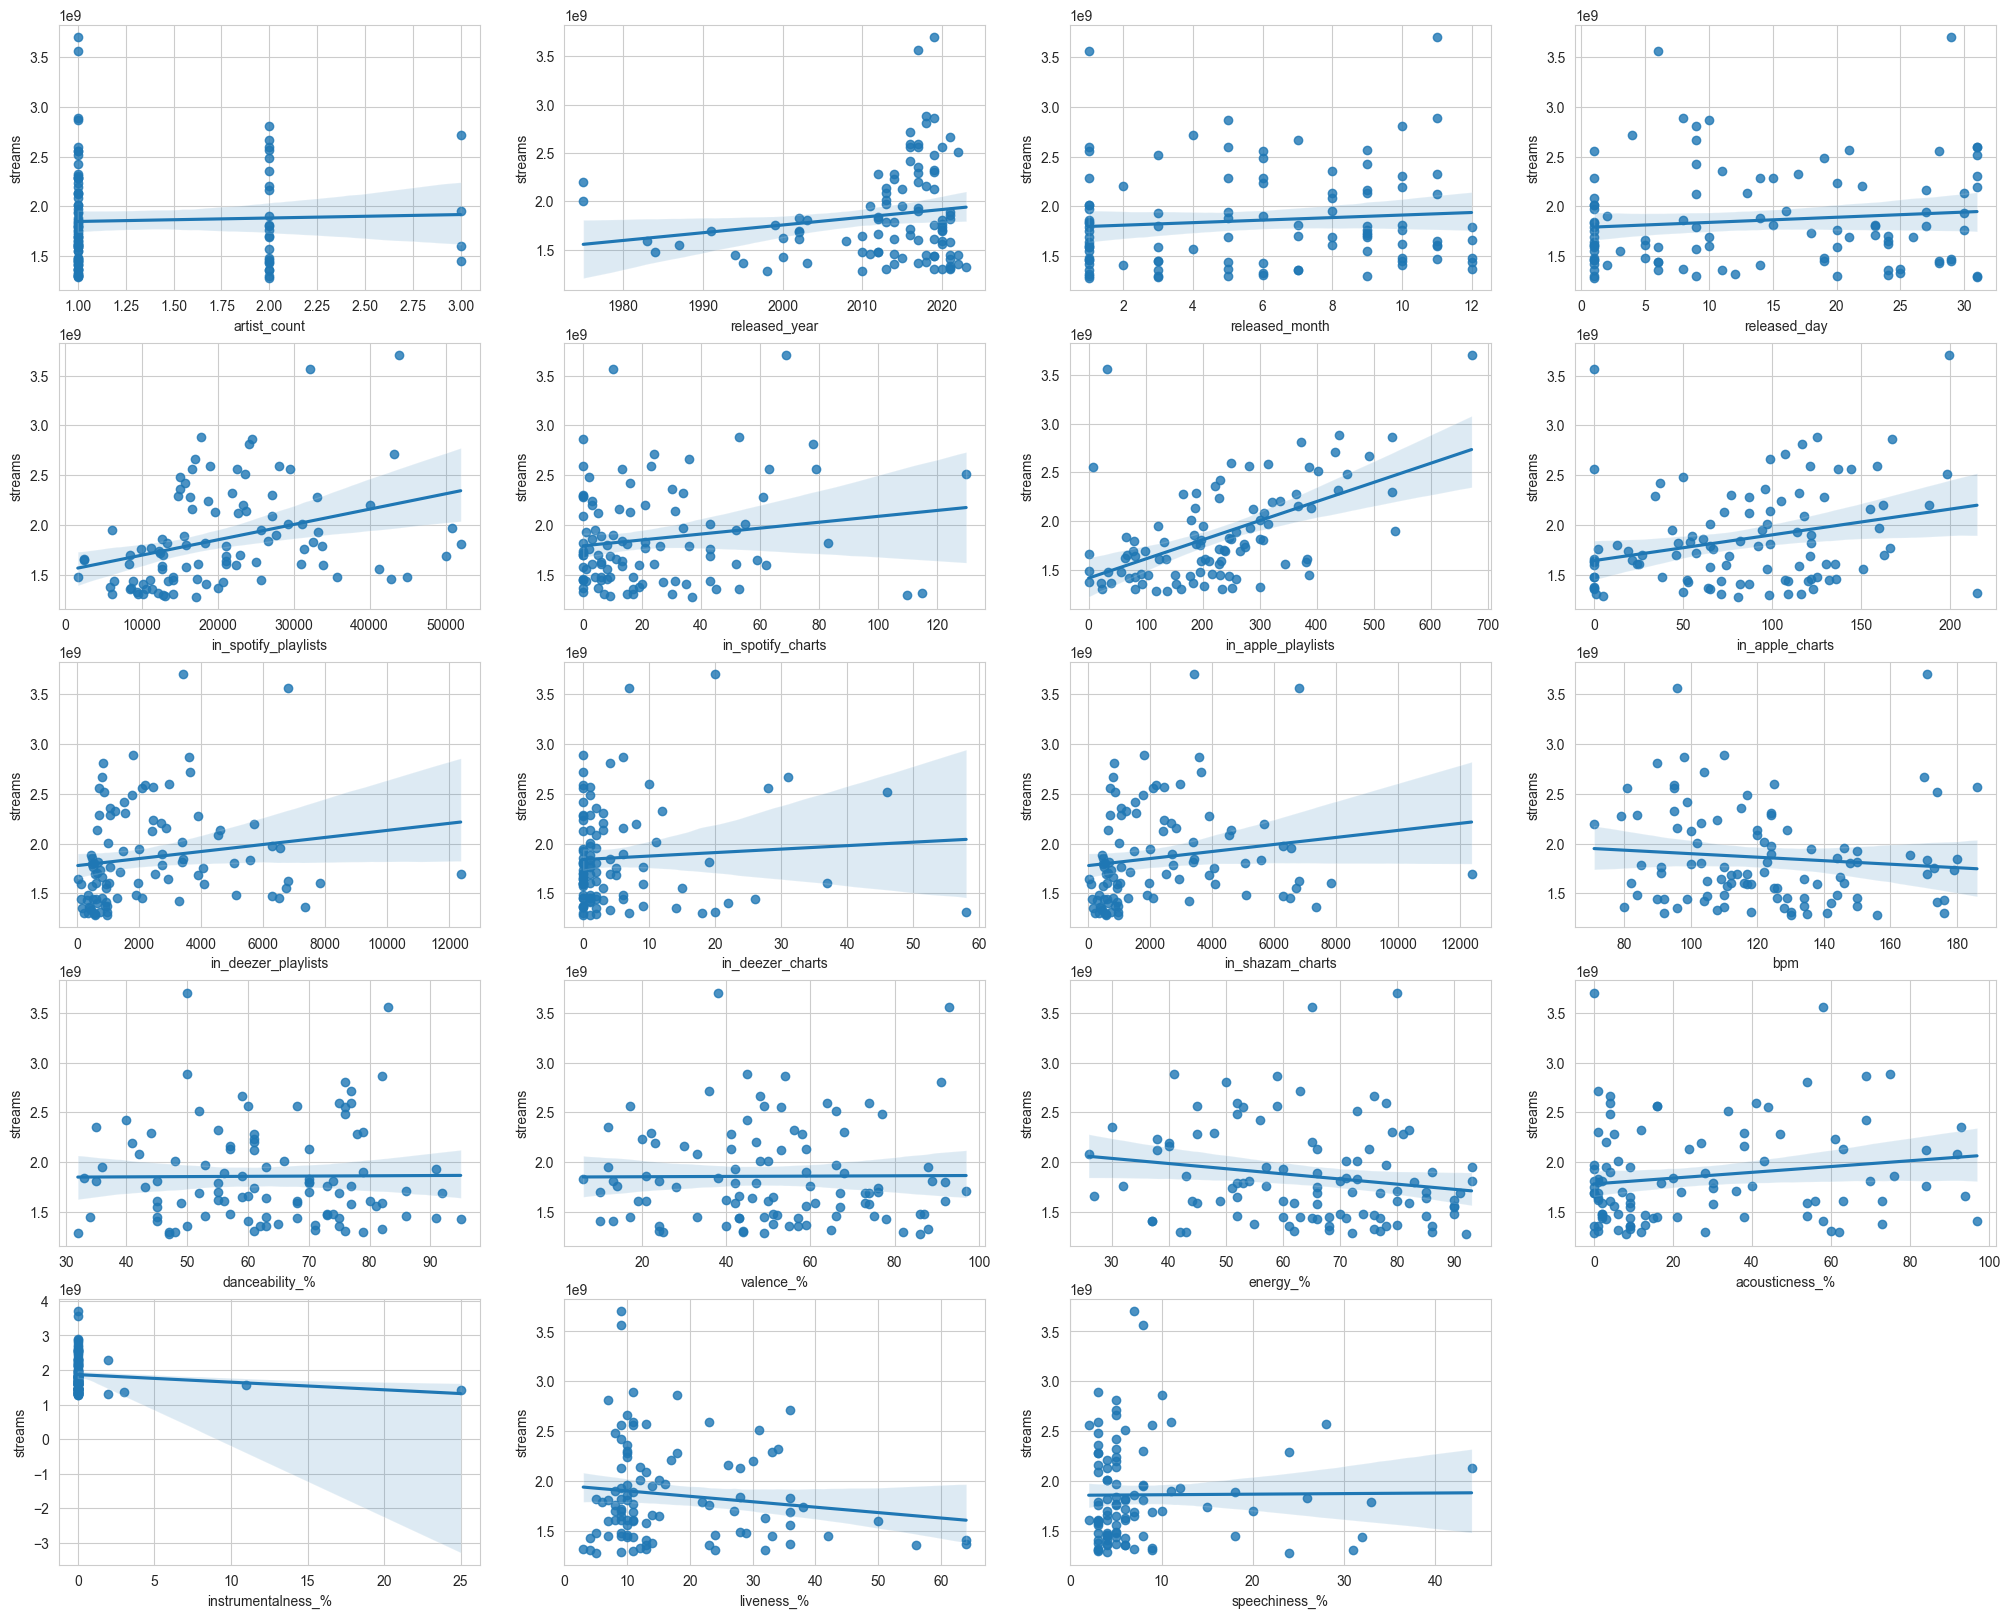

In [170]:
f,ax = plt.subplots(5,4,figsize = (25, 20))

num_cols = data_100_num.loc[:, data_100_num.columns != 'streams'].columns

for i, col in enumerate(num_cols):
        sns.regplot(data = data_100_num, x = col, y = 'streams', ax = ax[i//4,i%4])

ax[4, 3].set_axis_off()

Analyse valeurs catégoriques

In [171]:
data_100_cat = data_100.select_dtypes(include = ['O']).copy()
data_100_cat


,track_name,artist(s)_name,key,mode
55,Blinding Lights,The Weeknd,C#,Major
179,Shape of You,Ed Sheeran,C#,Minor
86,Someone You Loved,Lewis Capaldi,C#,Major
620,Dance Monkey,Tones and I,F#,Minor
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",D,Major
...,...,...,...,...
274,Shivers,Ed Sheeran,D,Major
401,Heather,Conan Gray,F,Major
22,I Wanna Be Yours,Arctic Monkeys,NaN,Minor
820,Iris,The Goo Goo Dolls,B,Minor


C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\1716094081.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\1716094081.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')


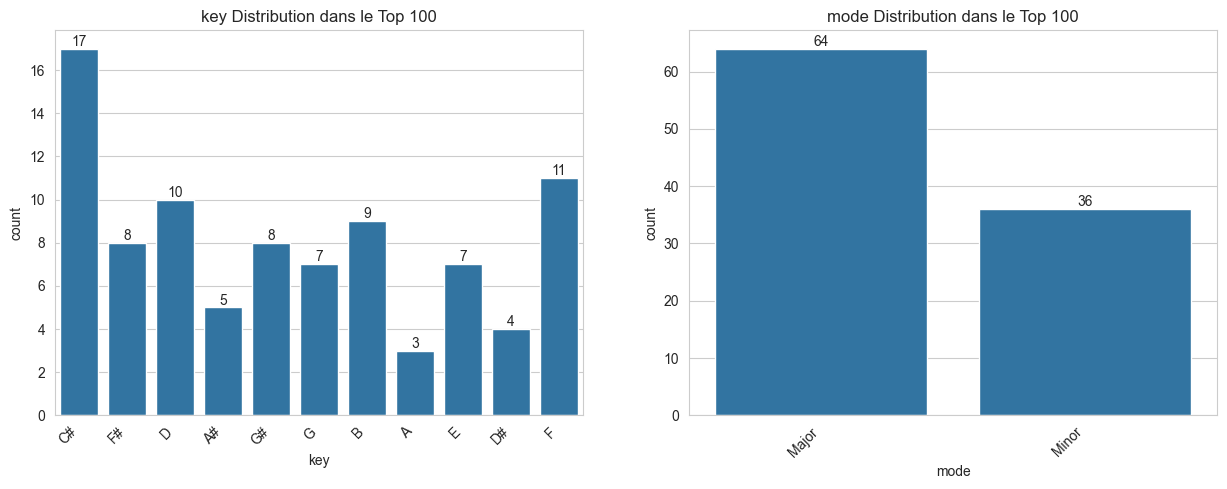

In [172]:
f,ax = plt.subplots(1,2,figsize = (15, 5))

for i, col in enumerate(['key', 'mode']):
    sns.countplot(data = data_100_cat, x = col, ax = ax[i])
    ax[i].set_title(col + ' Distribution dans le Top 100')
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
    ax[i].bar_label(ax[i].containers[0])

plt.show()

C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\544082202.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')
C:\Users\Dr House\AppData\Local\Temp\ipykernel_18052\544082202.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')


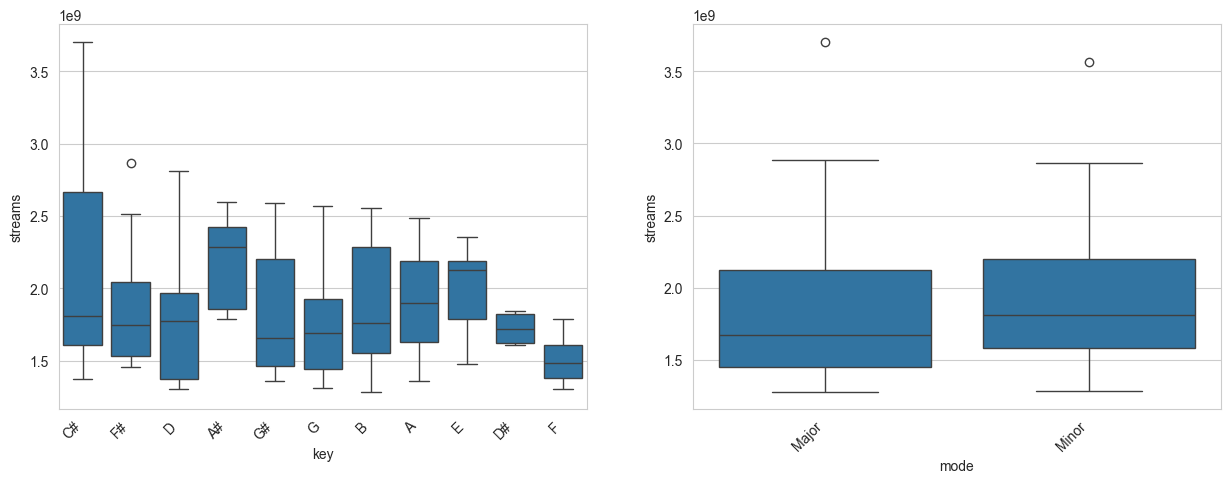

In [173]:
f = pd.melt(data_100, id_vars = ['streams'], value_vars = ['key', 'mode'])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

for i, col in enumerate(['key', 'mode']):
        sns.boxplot(data = f[f['variable']==col], x = 'value', y = 'streams', ax = ax[i])
        ax[i].set_xlabel(col)
        ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = 45, horizontalalignment = 'right')

<b> 4) Aller plus loin, que faut-il pour figurer en tête des classements Spotify ? </b>

In [174]:
data_50 = data.sort_values(by = 'streams', ascending = False).head(50)
data_250 = data.sort_values(by = 'streams', ascending = False).head(250)
data_500 = data.sort_values(by = 'streams', ascending = False).head(500)

data = [data_10, data_50, data_100, data_250, data_500, data]
labels = ['Top 10', 'Top 50', 'Top 100', 'Top 250', 'Top 500', 'Top 1000']

4.1) Analyse pour la gamme Do Majeur (C#), la gamme d'or

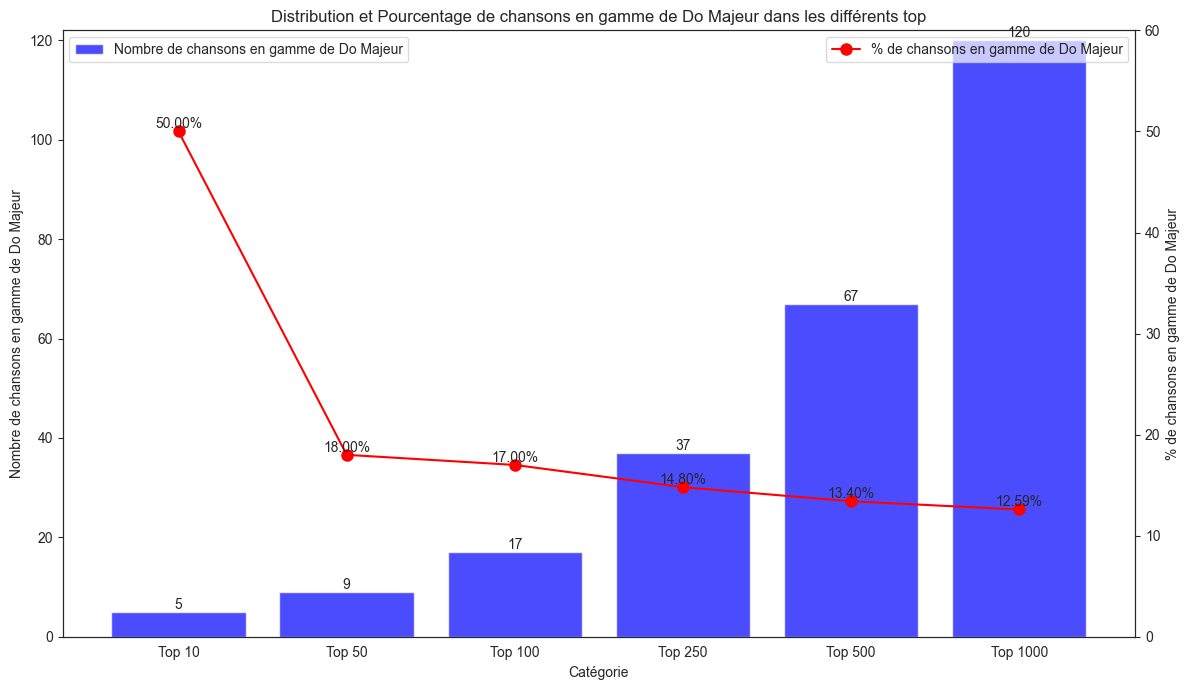

In [175]:
sns.set_style("white")

key_counts = []
key_percentages = []

for df in data:
    key_count = df['key'].value_counts()['C#']
    key_counts.append(key_count)
    key_percentage = (key_count / len(df)) * 100
    key_percentages.append(key_percentage)

fig, ax1 = plt.subplots(figsize = (12, 7))

ax1.bar(labels, key_counts, color = 'blue', alpha = 0.7, label = f'Nombre de chansons en gamme de Do Majeur')
ax1.set_xlabel('Catégorie')
ax1.set_ylabel(f'Nombre de chansons en gamme de Do Majeur')
ax1.set_title(f'Distribution et Pourcentage de chansons en gamme de Do Majeur dans les différents top')
ax1.set_ylim(0, max(key_counts) + 2)

ax2 = ax1.twinx()
ax2.plot(labels, key_percentages, marker = 'o', color = 'red', linestyle = '-', markersize = 8, label = f'% de chansons en gamme de Do Majeur')
ax2.set_ylabel(f'% de chansons en gamme de Do Majeur')
ax2.set_ylim(0, max(key_percentages) + 10)

for i, percentage in enumerate(key_percentages):
    ax2.text(i, percentage, f'{percentage:.2f}%', ha = 'center', va = 'bottom', fontsize = 10)

for i, count in enumerate(key_counts):
    ax1.text(i, count, str(count), ha = 'center', va = 'bottom', fontsize = 10)

ax1.legend(loc = 'upper left', framealpha = 0.7)
ax2.legend(loc = 'upper right', framealpha = 0.7)

plt.tight_layout()

4.2) Analyse selon que la gamme soit majeure ou mineure

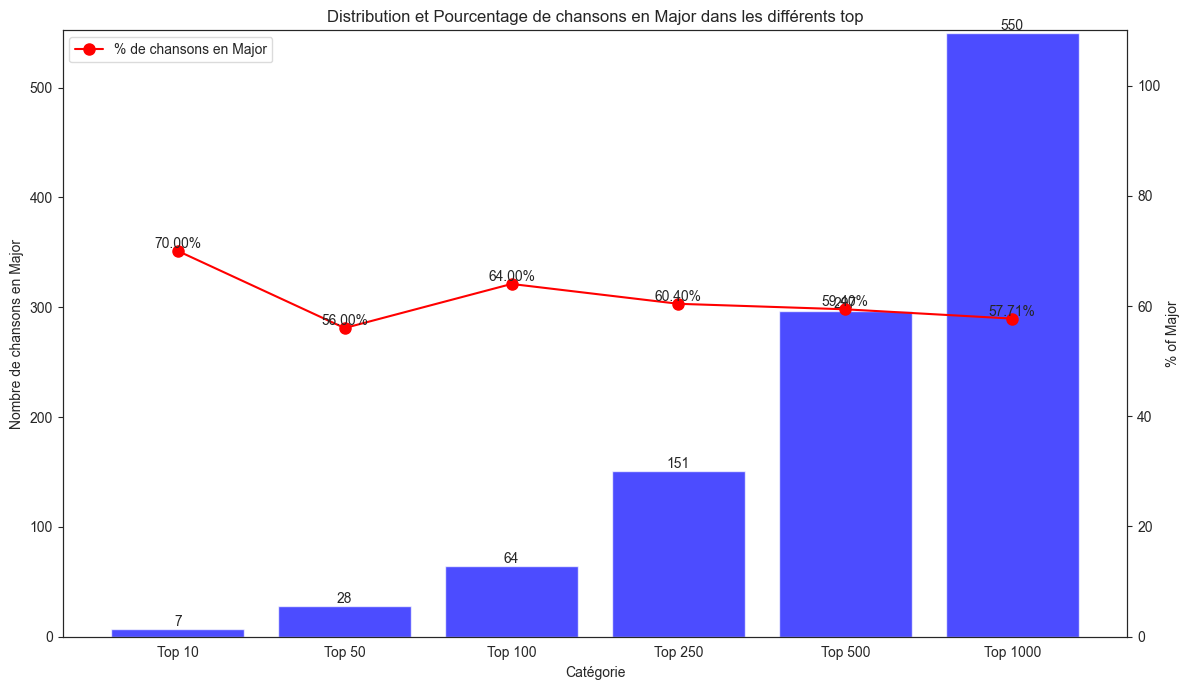

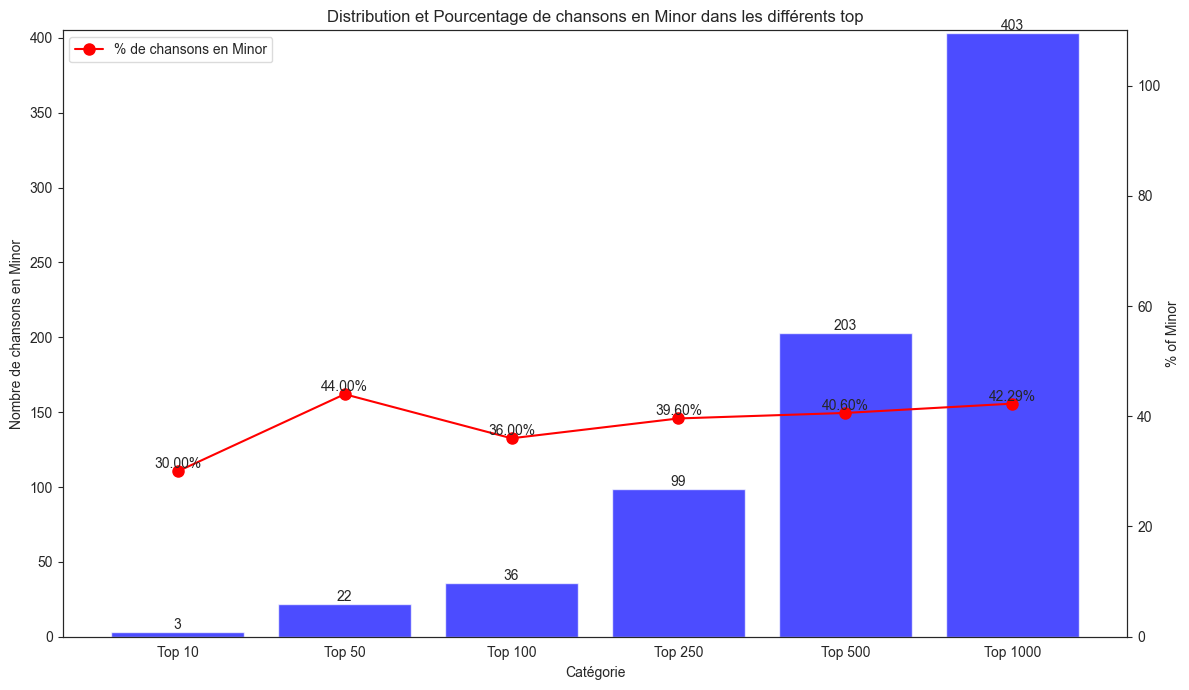

In [176]:
columns_of_interest = ['Major', 'Minor']

counts_1 = {col: [] for col in columns_of_interest}
counts_0 = {col: [] for col in columns_of_interest}

for df in data:
    for col in columns_of_interest:
        count_1 = df['mode'].value_counts()[col]
        count_0 = len(df) - count_1
        counts_1[col].append(count_1)
        counts_0[col].append(count_0)

for col in columns_of_interest:
    plt.figure(figsize = (12, 7))
    
    plt.bar(labels, counts_1[col], color = 'blue', alpha = 0.7, label = f'Count of {col} (1.0)')
    plt.xlabel('Catégorie')
    plt.ylabel(f'Nombre de chansons en {col}')
    plt.title(f'Distribution et Pourcentage de chansons en {col} dans les différents top')
    plt.ylim(0, max(counts_1[col]) + 2)

    for i, count in enumerate(counts_1[col]):
        plt.text(i, count, str(count), ha = 'center', va = 'bottom', fontsize = 10)
    
    plt.twinx()
    plt.plot(labels, [(count / len(df)) * 100 for count, df in zip(counts_1[col], data)], marker = 'o', color = 'red', linestyle = '-', markersize = 8, label = f'% de chansons en {col}')
    plt.ylabel(f'% of {col}')
    plt.ylim(0, 110)

    for i, count in enumerate(counts_1[col]):
        plt.text(i, (count / len(data[i])) * 100, f'{(count / len(data[i])) * 100:.2f}%', ha = 'center', va = 'bottom', fontsize = 10)
    
    plt.legend(loc = 'upper left', framealpha = 0.7)
    plt.tight_layout()

4.3) Analyse selon les artistes

In [177]:
artists_min = []
artists_max = []
artists_avg = []
artists_std = []

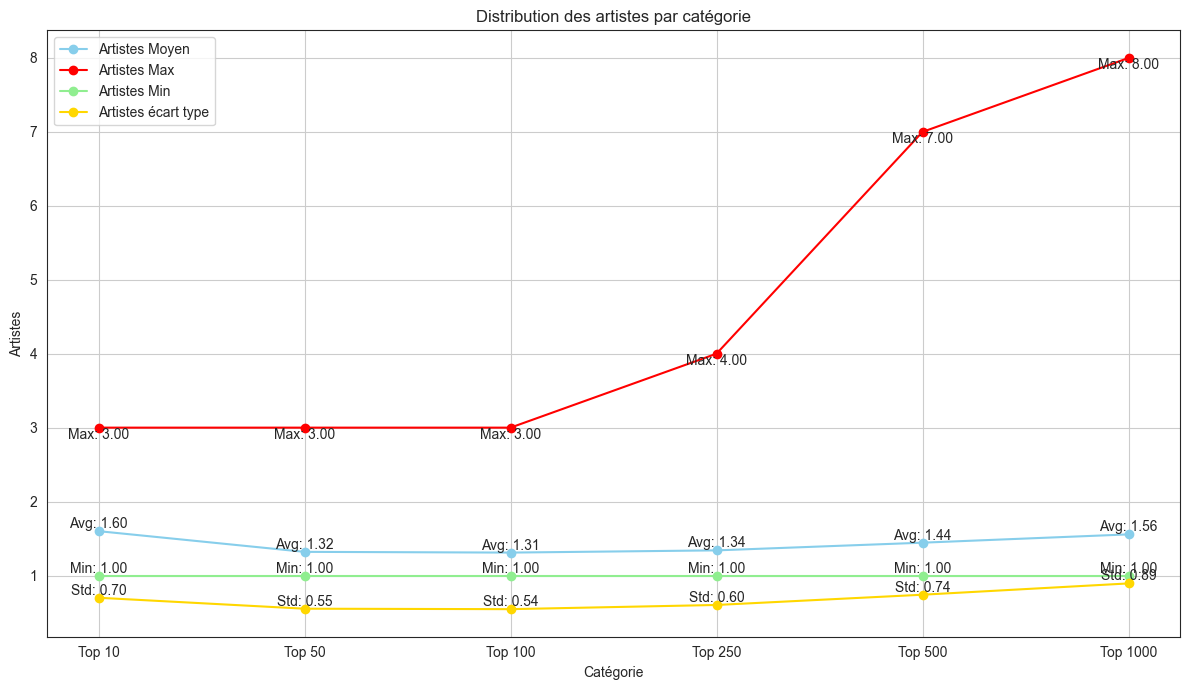

In [178]:
for df in data:
    artists_min.append(df['artist_count'].min())
    artists_max.append(df['artist_count'].max())
    artists_avg.append(df['artist_count'].mean())
    artists_std.append(df['artist_count'].std())

plt.figure(figsize = (12, 7))

plt.plot(labels, artists_avg, marker = 'o', linestyle = '-', color = 'skyblue', label = 'Artistes Moyen')
plt.plot(labels, artists_max, marker = 'o', linestyle = '-', color = 'red', label = 'Artistes Max')
plt.plot(labels, artists_min, marker = 'o', linestyle = '-', color ='lightgreen', label = 'Artistes Min')
plt.plot(labels, artists_std, marker = 'o', linestyle = '-', color ='gold', label = 'Artistes écart type')

plt.xlabel('Catégorie')
plt.ylabel('Artistes')
plt.title('Distribution des artistes par catégorie')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(artists_avg, artists_max, artists_min, artists_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha = 'center', va = 'top', fontsize = 10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()

4.4) Analyse selon les BPM

In [179]:
bpm_min = []
bpm_max = []
bpm_avg = []
bpm_std = []

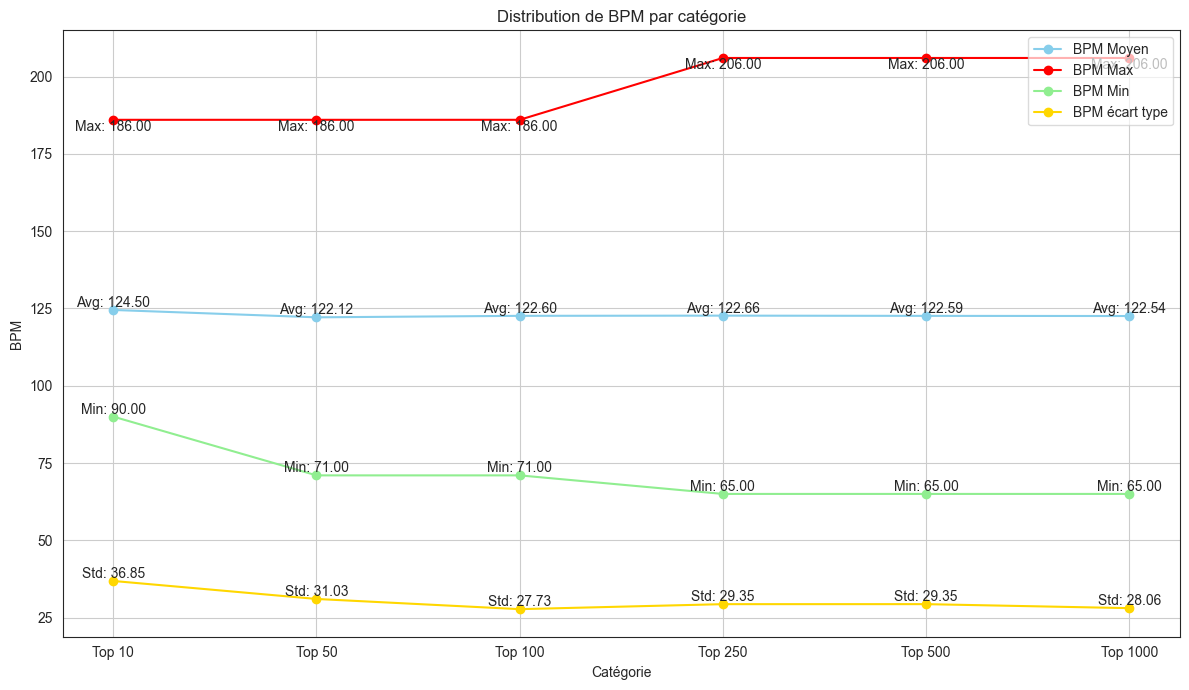

In [180]:
for df in data:
    bpm_min.append(df['bpm'].min())
    bpm_max.append(df['bpm'].max())
    bpm_avg.append(df['bpm'].mean())
    bpm_std.append(df['bpm'].std())

plt.figure(figsize=(12, 7))

plt.plot(labels, bpm_avg, marker = 'o', linestyle = '-', color = 'skyblue', label = 'BPM Moyen')
plt.plot(labels, bpm_max, marker = 'o', linestyle = '-', color = 'red', label = 'BPM Max')
plt.plot(labels, bpm_min, marker = 'o', linestyle = '-', color = 'lightgreen', label = 'BPM Min')
plt.plot(labels, bpm_std, marker = 'o', linestyle = '-', color = 'gold', label = 'BPM écart type')

plt.xlabel('Catégorie')
plt.ylabel('BPM')
plt.title('Distribution de BPM par catégorie')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(bpm_avg, bpm_max, bpm_min, bpm_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha = 'center', va = 'top', fontsize = 10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.legend(loc = 'upper right', framealpha = 0.7)
plt.tight_layout()

4.5) Analyse de dansabilité

In [181]:
danceability_min = []
danceability_max = []
danceability_avg = []
danceability_std = []

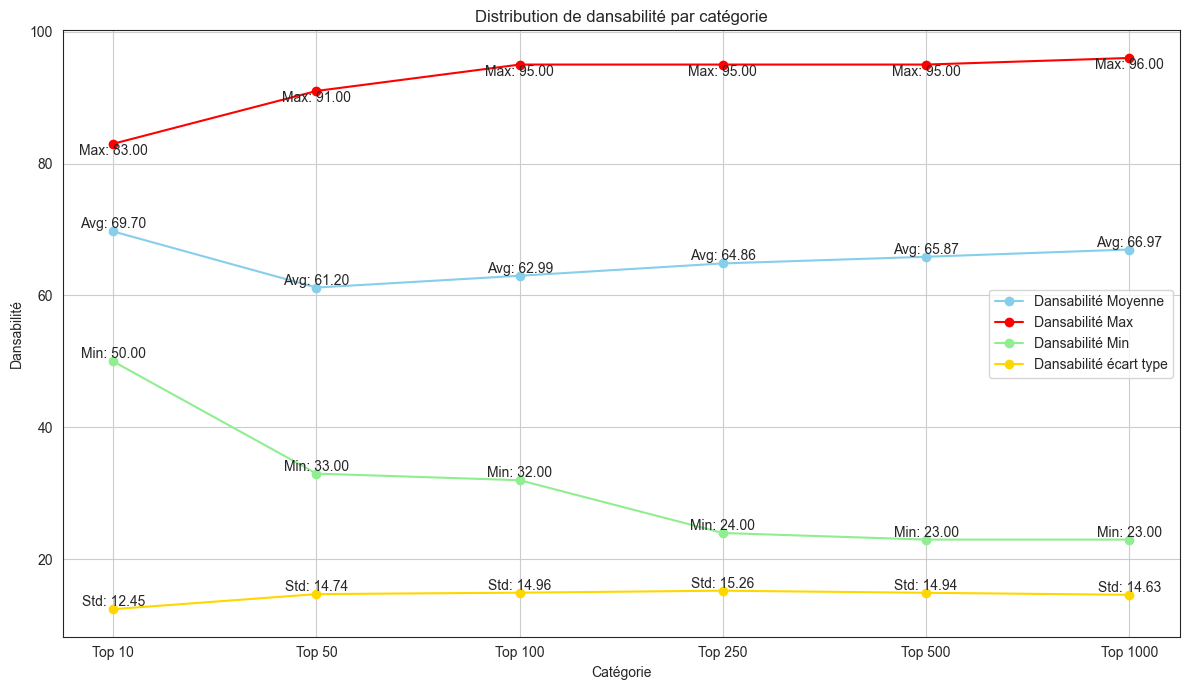

In [182]:
for df in data:
    danceability_min.append(df['danceability_%'].min())
    danceability_max.append(df['danceability_%'].max())
    danceability_avg.append(df['danceability_%'].mean())
    danceability_std.append(df['danceability_%'].std())

plt.figure(figsize=(12, 7))

plt.plot(labels, danceability_avg, marker = 'o', linestyle = '-', color = 'skyblue', label = 'Dansabilité Moyenne')
plt.plot(labels, danceability_max, marker = 'o', linestyle = '-', color = 'red', label = 'Dansabilité Max')
plt.plot(labels, danceability_min, marker = 'o', linestyle = '-', color = 'lightgreen', label = 'Dansabilité Min')
plt.plot(labels, danceability_std, marker = 'o', linestyle = '-', color = 'gold', label = 'Dansabilité écart type')

plt.xlabel('Catégorie')
plt.ylabel('Dansabilité')
plt.title('Distribution de dansabilité par catégorie')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(danceability_avg, danceability_max, danceability_min, danceability_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha = 'center', va = 'top', fontsize = 10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()

4.6) Analyse selon la valence

In [183]:
valence_min = []
valence_max = []
valence_avg = []
valence_std = []

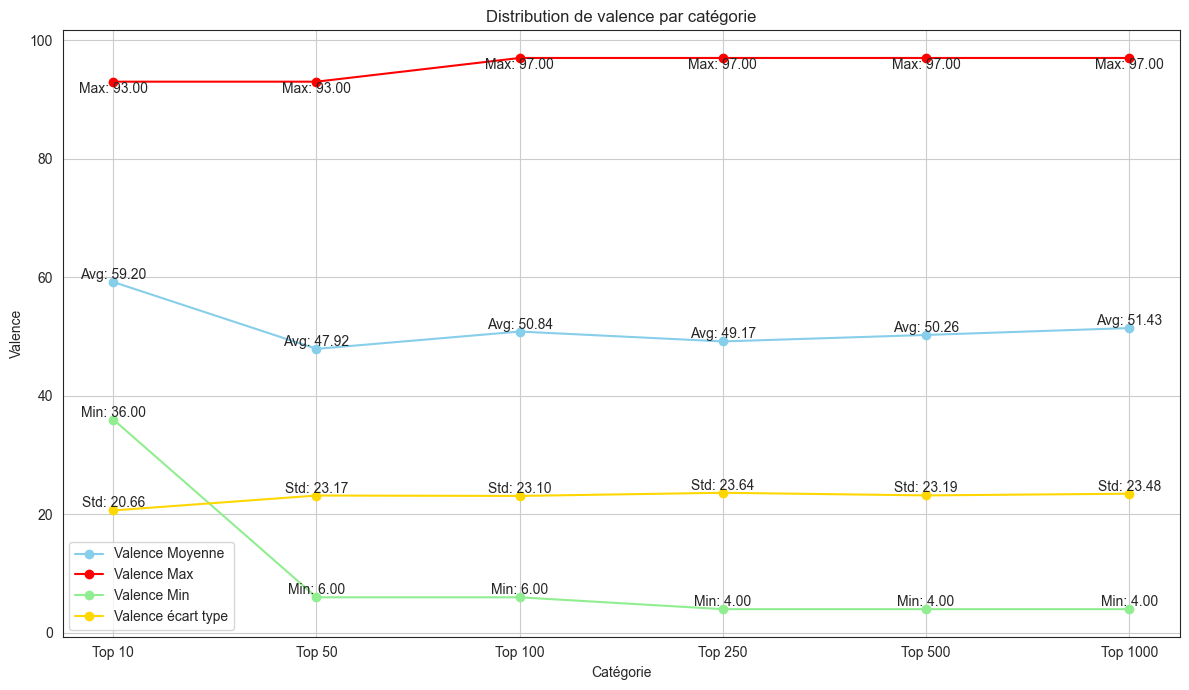

In [184]:
for df in data:
    valence_min.append(df['valence_%'].min())
    valence_max.append(df['valence_%'].max())
    valence_avg.append(df['valence_%'].mean())
    valence_std.append(df['valence_%'].std())

plt.figure(figsize=(12, 7))

plt.plot(labels, valence_avg, marker = 'o', linestyle = '-', color = 'skyblue', label = 'Valence Moyenne')
plt.plot(labels, valence_max, marker = 'o', linestyle = '-', color = 'red', label = 'Valence Max')
plt.plot(labels, valence_min, marker = 'o', linestyle = '-', color = 'lightgreen', label = 'Valence Min')
plt.plot(labels, valence_std, marker = 'o', linestyle = '-', color = 'gold', label = 'Valence écart type')

plt.xlabel('Catégorie')
plt.ylabel('Valence')
plt.title('Distribution de valence par catégorie')
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(valence_avg, valence_max, valence_min, valence_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha = 'center', va = 'top', fontsize = 10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()

4.7) Analyse selon l'acoustique

In [185]:
acousticness_min = []
acousticness_max = []
acousticness_avg = []
acousticness_std = []

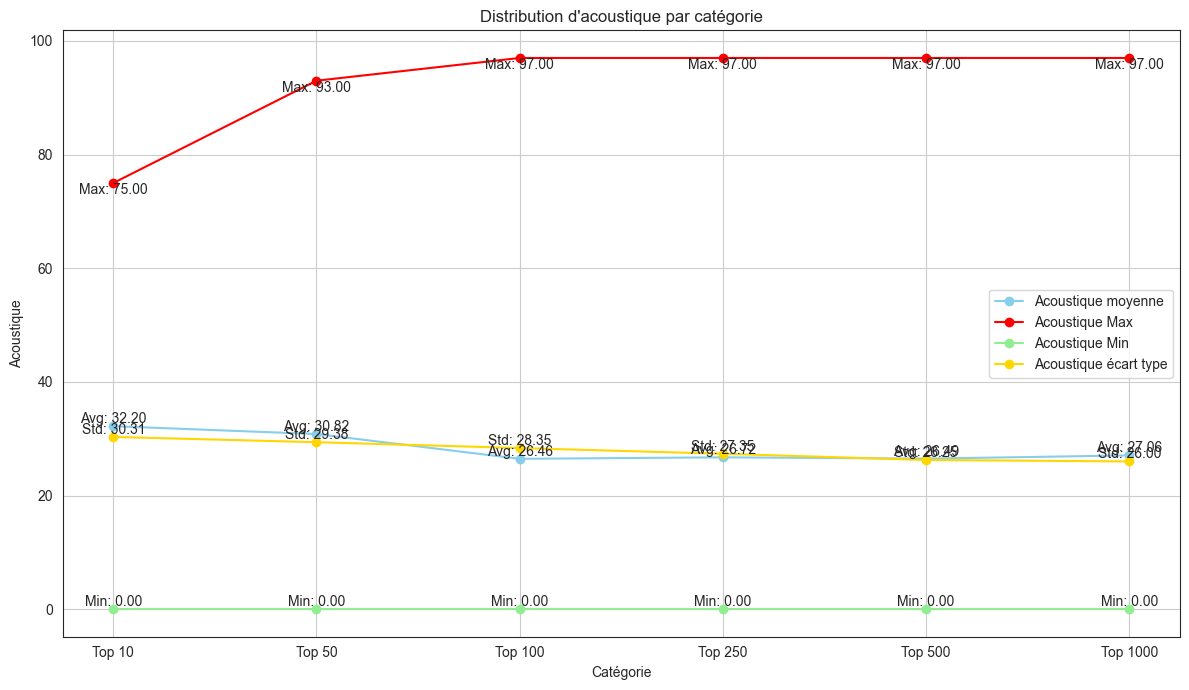

In [186]:
for df in data:
    acousticness_min.append(df['acousticness_%'].min())
    acousticness_max.append(df['acousticness_%'].max())
    acousticness_avg.append(df['acousticness_%'].mean())
    acousticness_std.append(df['acousticness_%'].std())

plt.figure(figsize=(12, 7))

plt.plot(labels, acousticness_avg, marker = 'o', linestyle = '-', color = 'skyblue', label = 'Acoustique moyenne')
plt.plot(labels, acousticness_max, marker = 'o', linestyle = '-', color = 'red', label = 'Acoustique Max')
plt.plot(labels, acousticness_min, marker = 'o', linestyle = '-', color = 'lightgreen', label = 'Acoustique Min')
plt.plot(labels, acousticness_std, marker = 'o', linestyle = '-', color = 'gold', label = 'Acoustique écart type')

plt.xlabel('Catégorie')
plt.ylabel('Acoustique')
plt.title("Distribution d'acoustique par catégorie")
plt.legend()
plt.grid(True)

for i, (avg, max_val, min_val, std_val) in enumerate(zip(acousticness_avg, acousticness_max, acousticness_min, acousticness_std)):
    plt.text(i, avg, f'Avg: {avg:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, max_val, f'Max: {max_val:.2f}', ha = 'center', va = 'top', fontsize = 10)
    plt.text(i, min_val, f'Min: {min_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)
    plt.text(i, std_val, f'Std: {std_val:.2f}', ha = 'center', va = 'bottom', fontsize = 10)

plt.tight_layout()